In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/colors.csv')

In [3]:
df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [4]:
df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [5]:
df['name']

0                           Unknown
1                             Black
2                              Blue
3                             Green
4                    Dark Turquoise
                   ...             
130    Trans Flame Yellowish Orange
131               Trans Fire Yellow
132          Trans Light Royal Blue
133                   Reddish Lilac
134                      [No Color]
Name: name, Length: 135, dtype: object

In [6]:
df['name'].nunique()

135

In [7]:
df['is_trans'].nunique()

2

In [8]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [9]:
df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [10]:
sets_df = pd.read_csv('data/sets.csv')

In [11]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [12]:
sets_df.groupby(by='year').min()

,set_num,name,theme_id,num_parts
year,,,,
1949,700.1-1,Extra-Large Gift Set (ABB),365,12
1950,700.1.1-1,Single 1 x 2 x 2 Window without Glass (ABB),371,1
1953,700.1-2,Automatic Binding Bricks - Small Brick Set (Le...,366,0
1954,700.16-1,Gift Package (Lego Mursten),371,4
1955,1200-1,1 x 1 Bricks,370,0
...,...,...,...,...
2017,10255-1,2016 Ford GT & 1966 Ford GT40,1,0
2018,10260-1,1968 Ford Mustang Fastback,1,0
2019,0241357594-1,100 LEGO Stores North America,1,0


In [13]:
sets_df[sets_df['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [14]:
sets_df.sort_values(by='num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [15]:
import matplotlib.pyplot as plt

In [16]:
sets_by_year = sets_df.groupby(by='year').count()

In [17]:
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

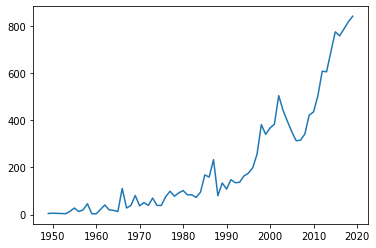

In [18]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [19]:
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [20]:
themes_by_year = sets_df.groupby(by='year').agg({'theme_id': pd.Series.nunique})

In [21]:
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [22]:
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)

In [23]:
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


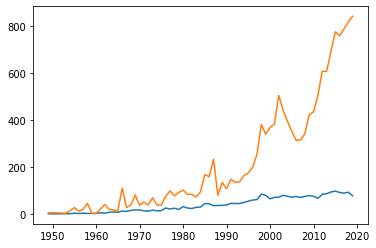

In [24]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

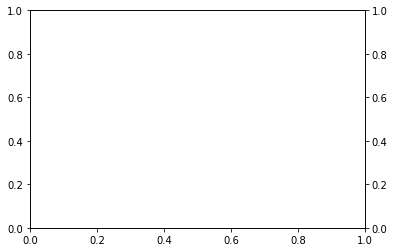

In [25]:
axys1 = plt.gca()
axys2 = axys1.twinx()

In [26]:
axys1.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='b')
axys2.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
axys1.set_xlabel('Year')
axys1.set_ylabel('Themes by year', color='blue')
axys2.set_ylabel('Sets by year', color='green')

Text(391.75, 0.5, 'Sets by year')

In [27]:
axys1

In [28]:
parts_per_set = sets_df.groupby(by='year').agg({'num_parts': pd.Series.mean})

In [30]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [31]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


In [32]:
sets_theme_count = sets_df['theme_id'].value_counts()

In [33]:
sets_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [34]:
themes_df = pd.read_csv('data/themes.csv')

In [35]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [36]:
themes_df.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


In [39]:
themes_df[themes_df['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [41]:
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [42]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [43]:
sets_theme_count = sets_df['theme_id'].value_counts()

In [45]:
sets_theme_count = pd.DataFrame({'id': sets_theme_count.index, 'set_count': sets_theme_count.values})

In [47]:
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [48]:
merged_data = pd.merge(sets_theme_count, themes_df, on='id')

In [49]:
merged_data


,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


<BarContainer object of 5 artists>

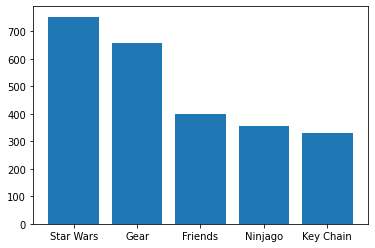

In [51]:
plt.bar(merged_data.name[:5], merged_data.set_count[:5])